<a href="https://colab.research.google.com/github/empios/175IC-machine-learning/blob/main/Zadanie3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ValueError: ignored

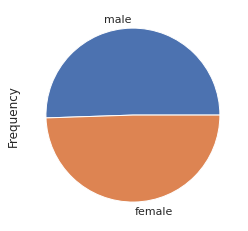

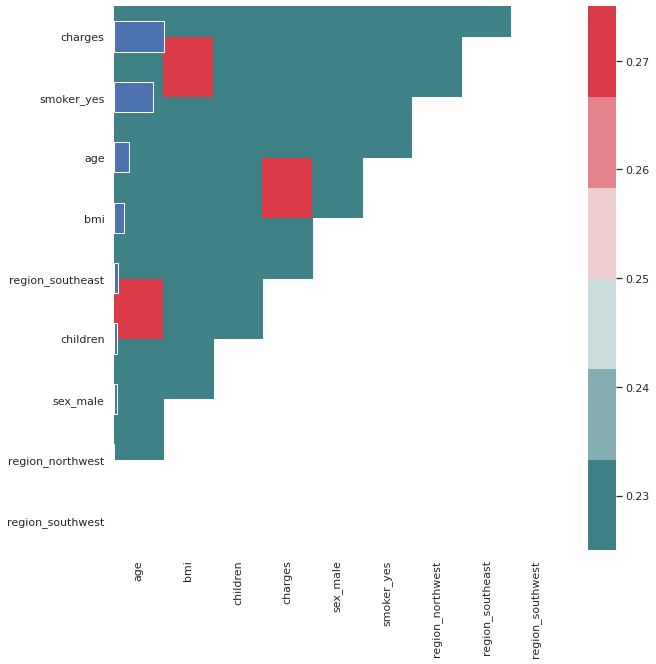

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")



np.random.seed(42)

df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df_raw.head()
df = df_raw.copy()
df.drop_duplicates()
df.sex.value_counts()
df.sex.value_counts().plot(kind='pie')
df.smoker.value_counts()
df.charges.plot(kind='hist', bins=30)
px.histogram(df, x='charges', width=700, height=400, nbins=50, facet_col='smoker', facet_row='sex')


df_dummies = pd.get_dummies(df,drop_first=True)
corr = df_dummies.corr()

sns.set(style='white')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = 1
plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(200,10)
sns.heatmap(corr,mask=mask, cmap=cmap,vmax=0.25,vmin=0.25)

df_dummies.corr()['charges'].sort_values(ascending=False)
df_dummies.corr()['charges'].sort_values().plot(kind='barh')

y_test = df.charges
y_train = df.charges
df = df.drop('charges', 1)
X_train = df
X_test = df


regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(f'R2 score: {regressor.score(X_test, y_test):.4f}')